In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
trainset = torchvision.datasets.CIFAR10(root ='./datasets', train = True, download = True, transform = transforms.ToTensor())


Files already downloaded and verified


In [0]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)

In [0]:
testset = torchvision.datasets.CIFAR10(root = './datasets', train = False, download = True, transform = transforms.ToTensor())

Files already downloaded and verified


In [0]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [0]:
testloader = torch.utils.data.DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 2)

In [0]:
labels = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horses', 'ship', 'truck')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
images_batch, labels_batch = iter(trainloader).next()


In [0]:
images_batch.shape

torch.Size([8, 3, 32, 32])

In [0]:
img = torchvision.utils.make_grid(images_batch)
img.shape

torch.Size([3, 36, 274])

In [0]:
np.transpose(img, (1, 2, 0)).shape

torch.Size([36, 274, 3])

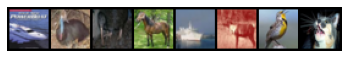

In [0]:
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('off')
plt.show()

In [0]:
import torch
import torch.nn as nn

In [0]:
input_size = 3
hidden1 = 16
hidden2 = 32
output_size = len(labels)
k_conv_size = 5

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(input_size, hidden1, k_conv_size),
        nn.BatchNorm2d(hidden1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))
    self.layer2 = nn.Sequential(
        nn.Conv2d(hidden1, hidden2, k_conv_size),
        nn.BatchNorm2d(hidden2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2))
    self.fc = nn.Linear(hidden2 * k_conv_size * k_conv_size, output_size)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)

    return out

In [0]:
model = ConvNet()
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [0]:
total_step = len(trainloader)
epochs = 10


In [0]:
for epoch in range(epochs):
  for i,(images, labels) in enumerate(trainloader):
    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print(f'epoch [{epoch+1}/{epochs}], Step [{i+1} / {total_step}], Loss: {loss.item()}')

epoch [1/10], Step [2000 / 6250], Loss: 1.2395622730255127
epoch [1/10], Step [4000 / 6250], Loss: 1.3187949657440186
epoch [1/10], Step [6000 / 6250], Loss: 0.6629356145858765
epoch [2/10], Step [2000 / 6250], Loss: 1.3842633962631226
epoch [2/10], Step [4000 / 6250], Loss: 1.5339078903198242
epoch [2/10], Step [6000 / 6250], Loss: 1.3150367736816406
epoch [3/10], Step [2000 / 6250], Loss: 1.1863317489624023
epoch [3/10], Step [4000 / 6250], Loss: 0.9544123411178589
epoch [3/10], Step [6000 / 6250], Loss: 1.0017305612564087
epoch [4/10], Step [2000 / 6250], Loss: 0.4848536550998688
epoch [4/10], Step [4000 / 6250], Loss: 0.845678448677063
epoch [4/10], Step [6000 / 6250], Loss: 1.0908657312393188
epoch [5/10], Step [2000 / 6250], Loss: 0.13531482219696045
epoch [5/10], Step [4000 / 6250], Loss: 1.3395497798919678
epoch [5/10], Step [6000 / 6250], Loss: 1.6318212747573853
epoch [6/10], Step [2000 / 6250], Loss: 0.21449047327041626
epoch [6/10], Step [4000 / 6250], Loss: 1.2773784399032

In [0]:
model.eval()
with torch.no_grad():
  correct = 0
  count = 0
  for images, labels in testloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    count+= labels.size(0)
    correct +=(predicted == labels).sum().item()

  print(f'Accuracy of the model on the test images is  { 100 * correct / count} ')

Accuracy of the model on the test images is  68.36 
